In [1]:
import matplotlib.pyplot as plt

In [ ]:
def zViewModifier(perspective: tuple, pointsList: list, zD: float):
    pX, pZ = perspective

    for x, z1 in pointsList:

        xV, zV = x - pX, zD - pZ

        newX: float
        newZ: float

        t = (newX - pX) / (xV)
        newZ = pZ + zV * t

        distance = lineDistance()



def lineDistance()





In [4]:
def zViewModifier(perspective: tuple, pointList: list, zDistance: float):

    """
        First step: calculate the vector between the new point and the perspective point.

        Second step: calculate the distance between the original point and the line.

    """

    newPointList = []
    x0, z0 = perspective

    for point in pointList:

        x1, z1 = point

        secondPoint = (x1, zDistance)

        vector = getVector(perspective, secondPoint)
        newPoint = getIntersectionPoint(perspective, vector, z1)

        newPointList.append(newPoint)

    return newPointList


def getVector(perspective: tuple, secondPoint: tuple):

    x0, z0 = perspective
    x2, z2 = secondPoint

    return (x2 - x0, z2 - z0)


def getIntersectionPoint(perspective: tuple, vector: tuple, zPoint: float):

    xp, zp = perspective
    xv, zv = vector

    newX = xp + xv * ((zPoint - zp) / zv)

    return (newX, zPoint)


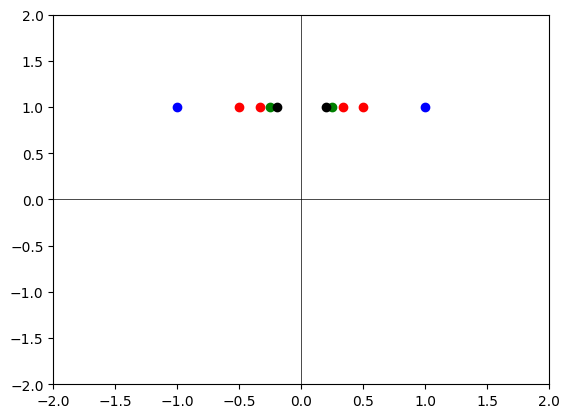

In [15]:
perspective = (0, 0)
squarePoints = [( 1,  1),
                (-1,  1)]

newSquare = zViewModifier(perspective, squarePoints, 2)
newSquare2 = zViewModifier(perspective, squarePoints, 3)
newSquare3 = zViewModifier(perspective, squarePoints, 4)
newSquare4 = zViewModifier(perspective, squarePoints, 5)


X, Y = zip(*squarePoints)

fig, ax = plt.subplots()

ax.scatter(X, Y, color='blue')


ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)

x_lim = max(abs(min(X)), abs(max(X))) + 1
y_lim = max(abs(min(Y)), abs(max(Y))) + 1
ax.set_xlim(-x_lim, x_lim)
ax.set_ylim(-y_lim, y_lim)

X, Y = zip(*newSquare)
ax.scatter(X, Y, color='red')

X, Y = zip(*newSquare2)
ax.scatter(X, Y, color='red')

X, Y = zip(*newSquare3)
ax.scatter(X, Y, color='green')

X, Y = zip(*newSquare4)
ax.scatter(X, Y, color='black')


plt.show()

In [16]:
def zViewModifier(perspective: tuple, pointList: list, distance: tuple):

    """
        First step: calculate the vector between the new point and the perspective point.

        Second step: calculate the distance between the original point and the line.

    """

    newPointList = []
    x0, z0 = perspective

    xD, zD = distance

    for point in pointList:

        vector = getVector(perspective, distance)
        newPoint = getIntersectionPoint(perspective, vector, point)

        newPointList.append(newPoint)

    return newPointList


def getVector(perspective: tuple, secondPoint: tuple):

    x0, z0 = perspective
    x2, z2 = secondPoint

    return (x2 - x0, z2 - z0)


def getIntersectionPoint(perspective: tuple, vector: tuple, point: tuple):

    xp, zp = perspective
    xv, zv = vector

    xPoint, zPoint = point

    newX = xp + xv * ((zPoint - zp) / zv)

    newZ = zp + zv * ((xPoint - xp) / xv)

    return (newX, newZ)


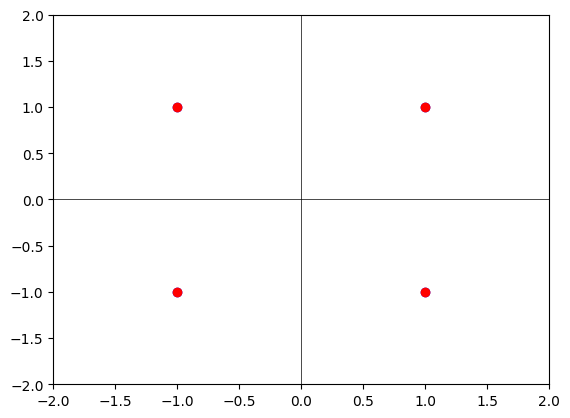

In [21]:
perspective = (0, 0)
squarePoints = [( 1,  1),
                (-1,  1),
                (-1, -1),
                ( 1, -1)]

distance = (4, 4)

newSquare = zViewModifier(perspective, squarePoints, distance)


X, Y = zip(*squarePoints)

fig, ax = plt.subplots()

ax.scatter(X, Y, color='blue')


ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)

x_lim = max(abs(min(X)), abs(max(X))) + 1
y_lim = max(abs(min(Y)), abs(max(Y))) + 1
ax.set_xlim(-x_lim, x_lim)
ax.set_ylim(-y_lim, y_lim)

X, Y = zip(*newSquare)
ax.scatter(X, Y, color='red')


plt.show()

# Perspective program:

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import math
import numpy as np

Object represents a cube, this cube must be a list of 3 lists, each one represents a square.

In [6]:
def move(movement: list, object: list, perspective: list):

    xM, yM, zM = movement

    position, _ = perspective

    position[0] += xM
    position[1] += yM
    position[2] += zM


### View:

In [22]:
def printImage(object: list, perspective: list):

    viewDegree = 80
    viewDegree = math.radians(viewDegree)

    lengthView = 80

    padding = lengthView * math.tan(viewDegree)

    position, _, _ = perspective

    x0, y0, z0 = position

    fig, ax = plt.subplots()

    padding = 10

    # Loop through each square and add it to the plot
    for points in object:

        newPoints = []

        for point in points:

            x, y, _ = point

            newPoints.append((x, y))

        # Create a polygon patch for the square
        square = patches.Polygon(newPoints, closed=True, fill=True)
        # Add the polygon patch to the axes
        ax.add_patch(square)

    # Set the x and y axis limits to make sure all squares are in view
    ax.set_xlim(x0 - padding, x0 + padding)
    ax.set_ylim(y0, y0 + 2 * padding)

    # Display the plot
    plt.show()

### Code:

In [88]:
object = [
    [[0, 0, 0], [0, 1, 0], [1, 1, 0], [1, 0, 0]],
    [[1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 0, 1]],
    [[0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]],
    [[0, 0, 0], [0, 1, 0], [0, 1, 1], [0, 0, 1]]
]

object = [
    [[-0.5, 0, -0.5], [-0.5, 1, -0.5], [ 0.5, 1, -0.5], [ 0.5, 0, -0.5]],
    [[ 0.5, 0, -0.5], [ 0.5, 1, -0.5], [ 0.5, 1,  0.5], [ 0.5, 0,  0.5]],
    [[-0.5, 0,  0.5], [-0.5, 1,  0.5], [ 0.5, 1,  0.5], [ 0.5, 0,  0.5]],
    [[-0.5, 0, -0.5], [-0.5, 1, -0.5], [-0.5, 1,  0.5], [-0.5, 0,  0.5]]
]

object = [
    [[0, 0, 0], [0, 1, 0], [1, 1, 0], [1, 0, 0]],
    [[1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 0, 1]],
    [[1, 0, 1], [1, 1, 1], [0, 1, 1], [0, 0, 1]],
    [[0, 0, 1], [0, 1, 1], [0, 1, 0], [0, 0, 0]]
]

object = [
    [[-0.5, 0, -0.5], [-0.5, 1, -0.5], [ 0.5, 1, -0.5], [ 0.5, 0, -0.5]],
    [[ 0.5, 0, -0.5], [ 0.5, 1, -0.5], [ 0.5, 1,  0.5], [ 0.5, 0,  0.5]],
    [[ 0.5, 0,  0.5], [ 0.5, 1,  0.5], [-0.5, 1,  0.5], [-0.5, 0,  0.5]],
    [[-0.5, 0,  0.5], [-0.5, 1,  0.5], [-0.5, 1, -0.5], [-0.5, 0, -0.5]]
]

perspective = [[0, 0, -1]]

colors = np.random.rand(len(object), 3)


In [67]:
def calculate_normal(square):

    v1 = np.array(square[1]) - np.array(square[0])
    v2 = np.array(square[2]) - np.array(square[1])
    normal = np.cross(v1, v2)

    return normal / np.linalg.norm(normal)

In [109]:
def printImage(object: list, perspective: list, colors: list):
    position = perspective[0]


    x0, y0, z0 = position

    padding = 5

    fig, ax = plt.subplots()

    # Loop through each square and add it to the plot
    for i, square in enumerate(object):

        normal = calculate_normal(square)
        #print(normal)

        visible = False
        for point in square:

            vec_to_perspective = np.array(position) - np.array(point)
            dot_product = np.dot(normal, vec_to_perspective)

            #print(dot_product)

            """if dot_product > 0:
                visible = True
                break"""
            
            if normal[2] > 0:
                visible = True
                break

        if visible:

            newPoints = []

            for point in square:

                x, y, _ = point
                newPoints.append((x, y))

            # Create a polygon patch for the square
            square = patches.Polygon(newPoints, closed=True, fill=True, color=colors[i])
            # Add the polygon patch to the axes
            ax.add_patch(square)

    # Set the x and y axis limits to make sure all squares are in view
    ax.set_xlim(x0 - padding, x0 + padding)
    ax.set_ylim(y0, y0 + 2 * padding)

    # Display the plot
    plt.show()

In [103]:
def rotatePoints(object: list, theta: float):
    thetaRad = math.radians(theta)

    rotationYMatrix = [[math.cos(thetaRad), 0, math.sin(thetaRad)],
                       [0, 1, 0],
                       [-math.sin(thetaRad), 0, math.cos(thetaRad)]]
    
    newObject = []

    for square in object:

        newSquare = []

        for point in square:
            
            result = np.dot(point, rotationYMatrix)
            newSquare.append(result)

            #print(result)
        
        newObject.append(newSquare)
    
    return newObject


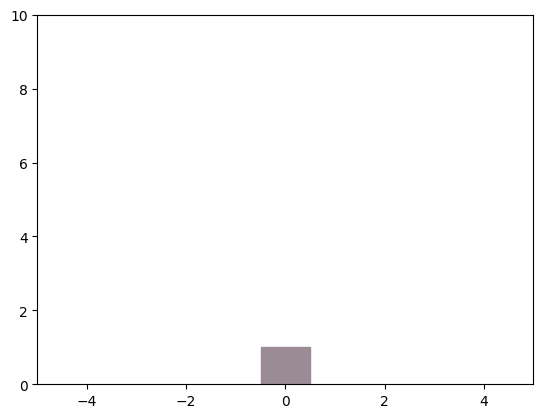

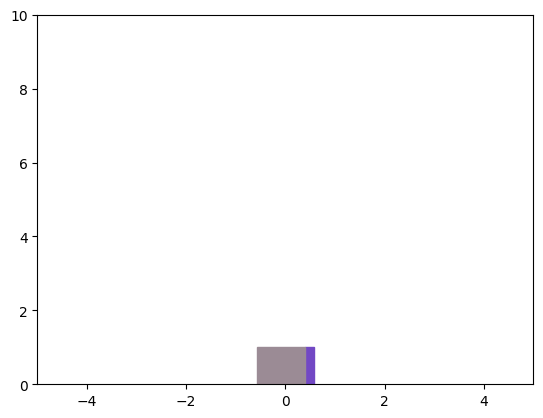

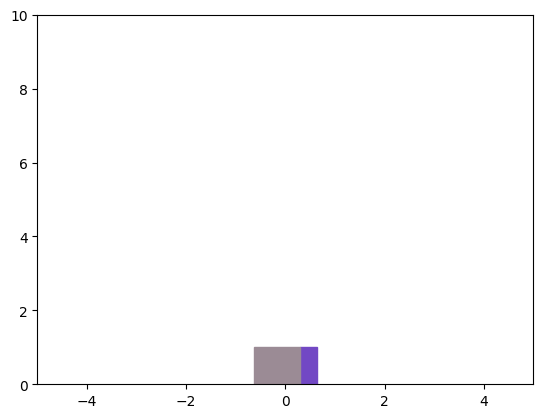

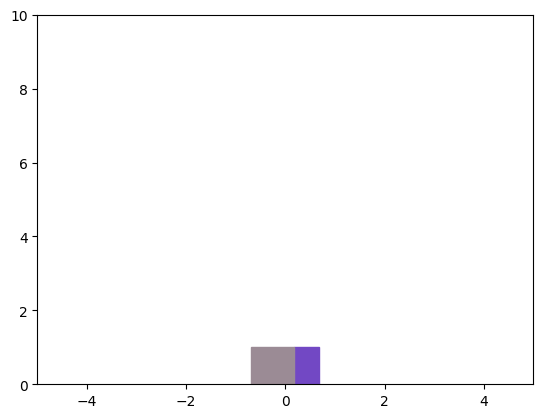

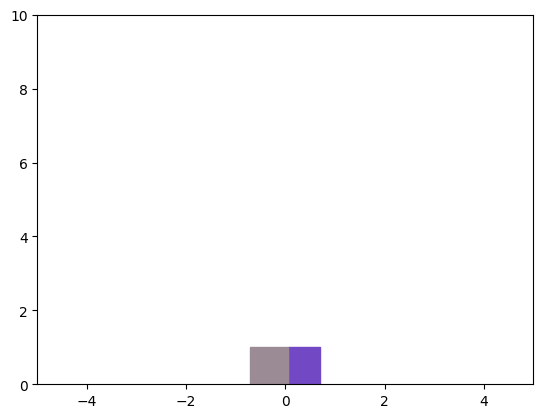

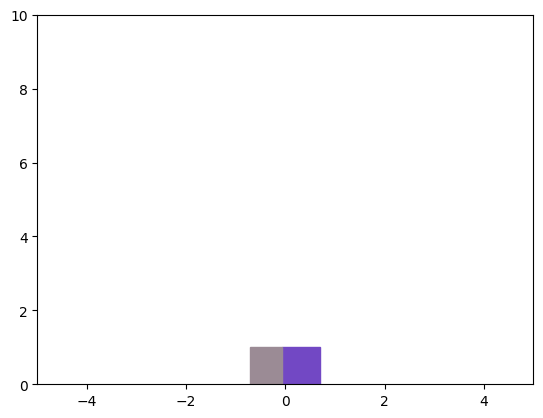

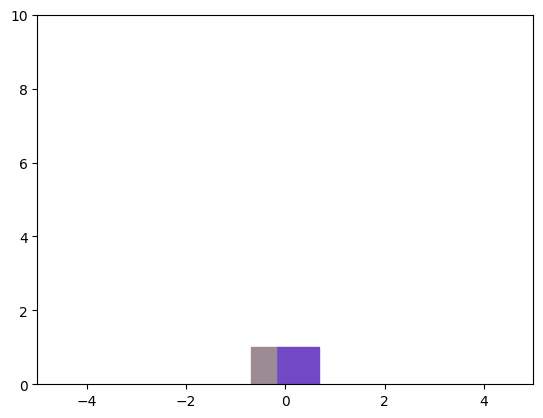

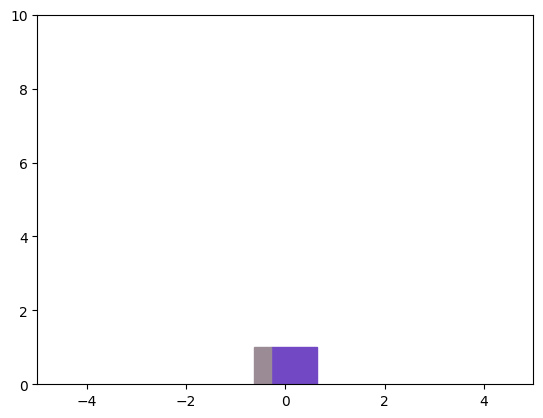

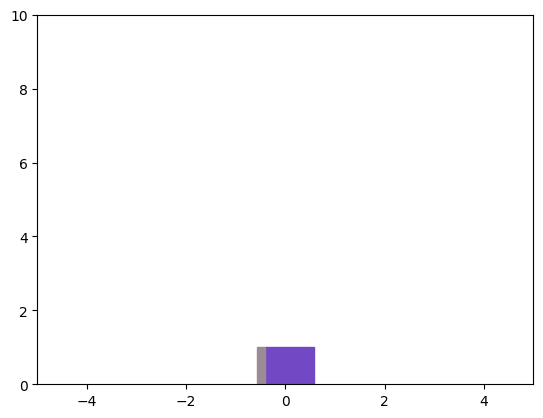

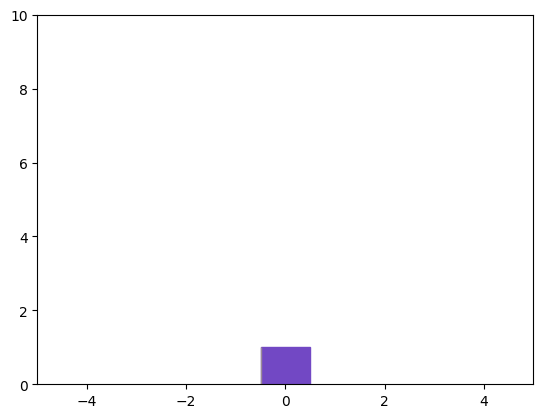

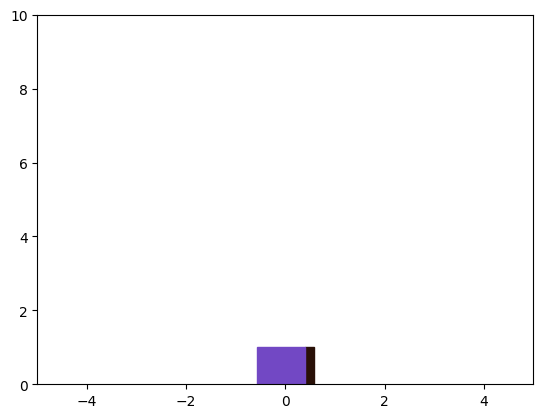

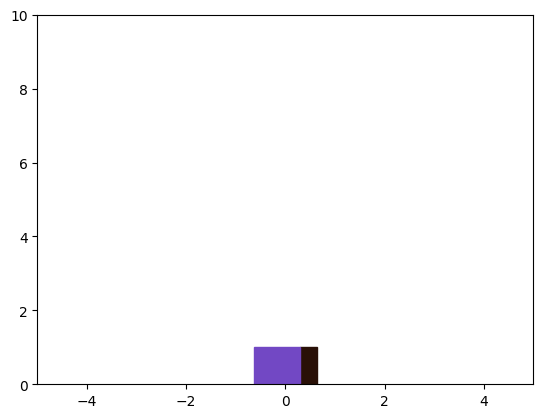

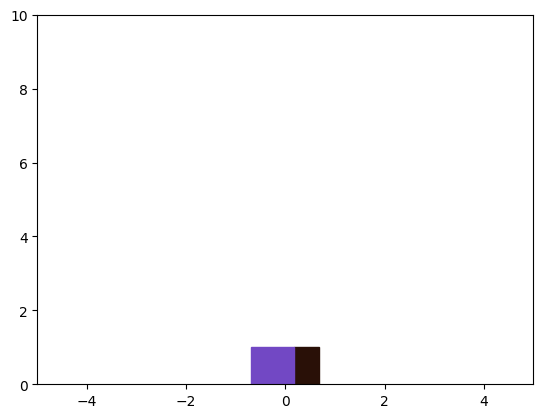

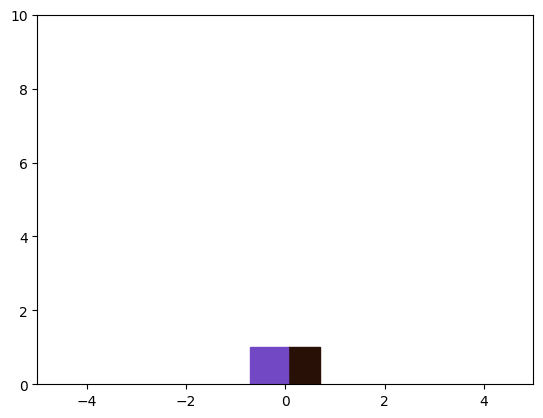

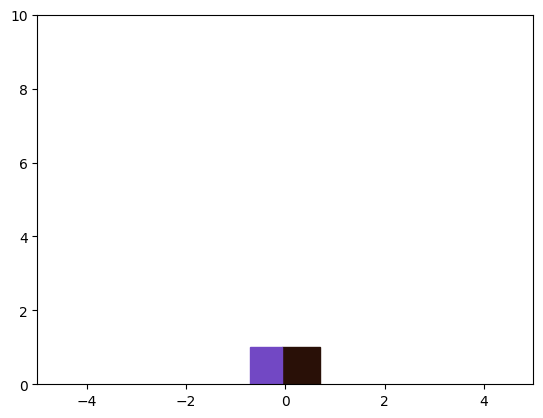

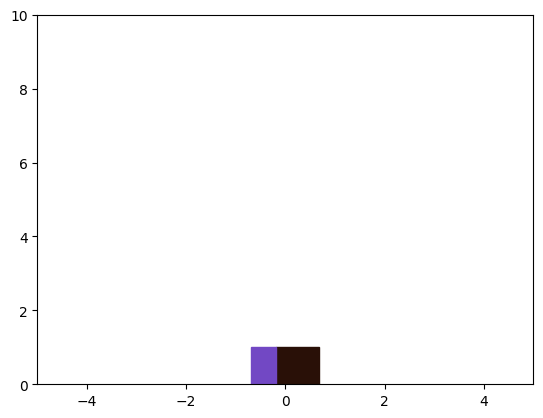

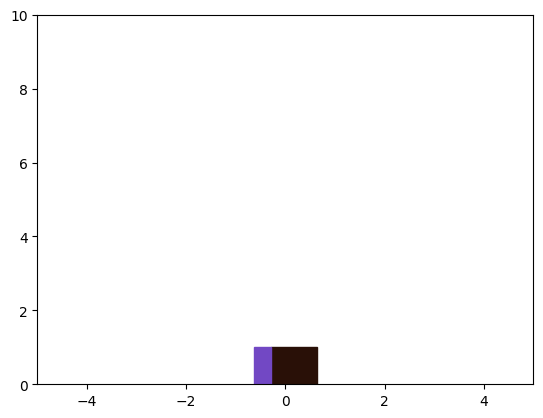

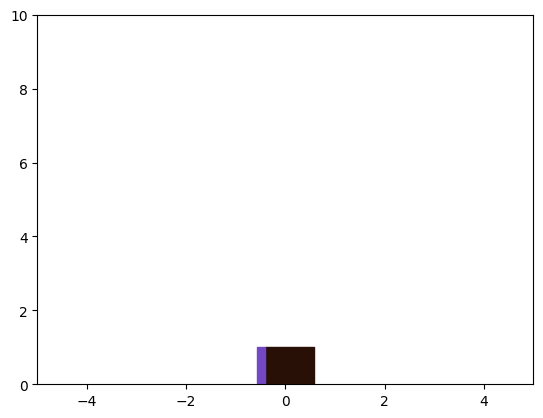

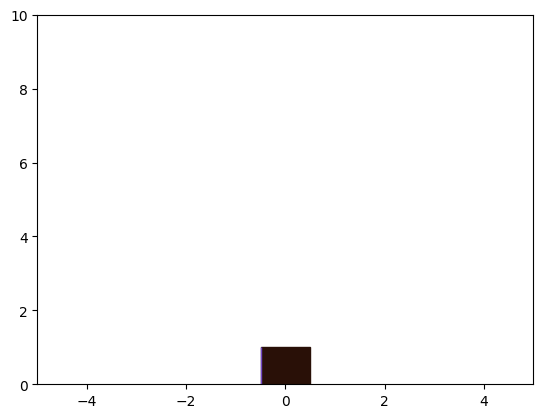

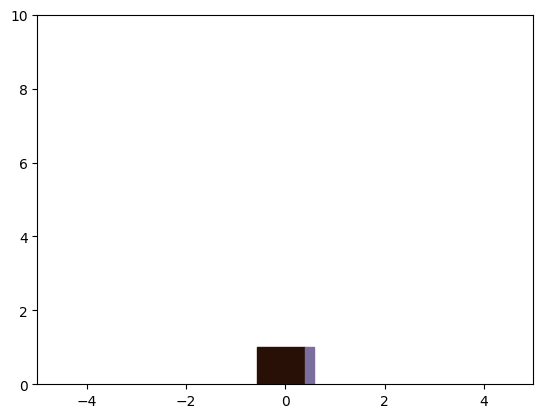

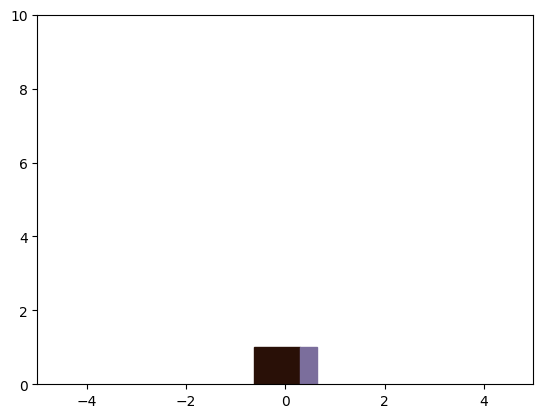

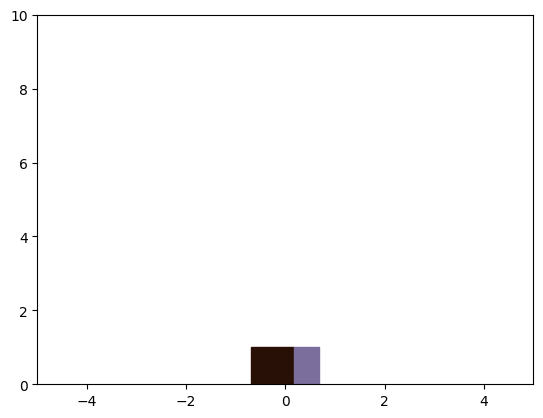

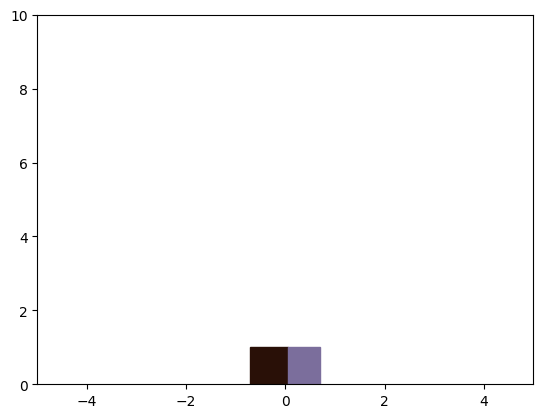

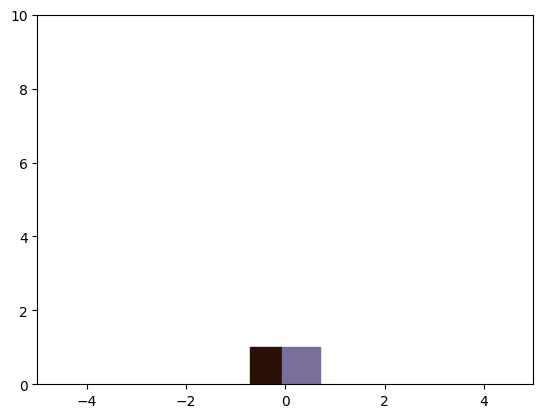

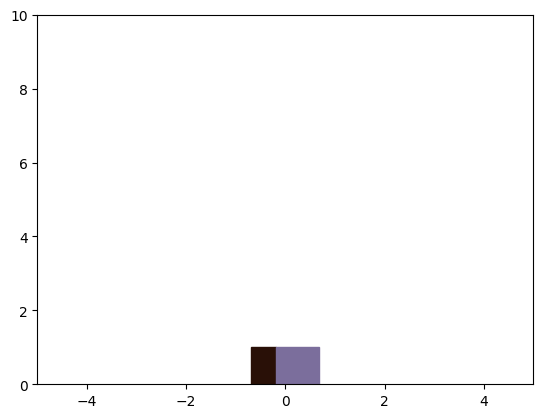

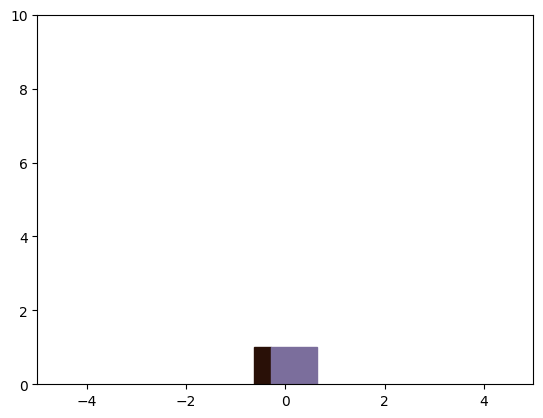

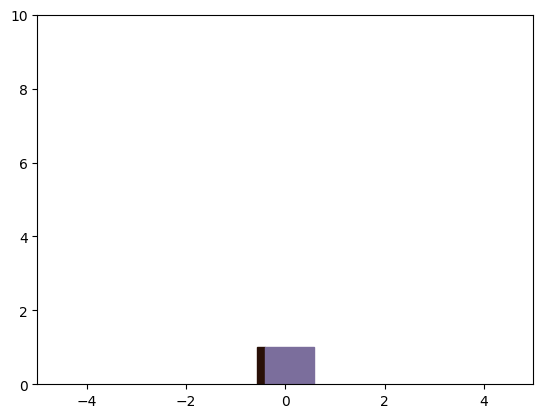

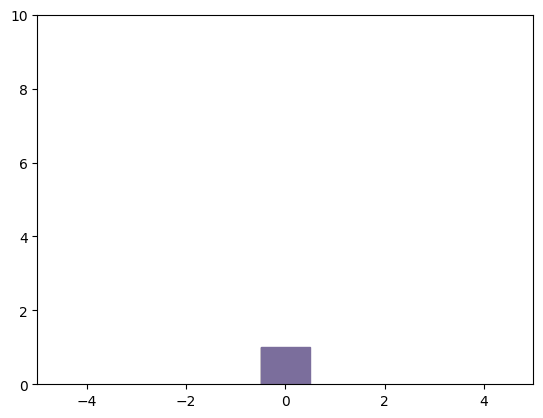

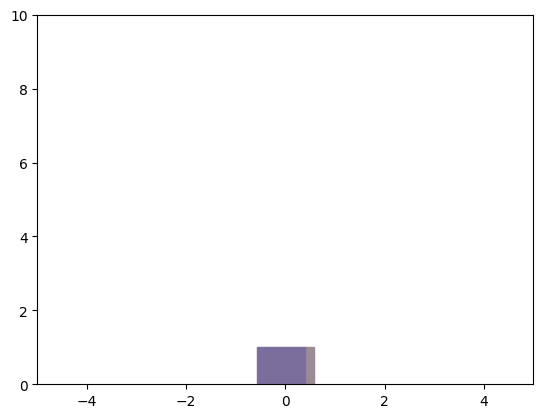

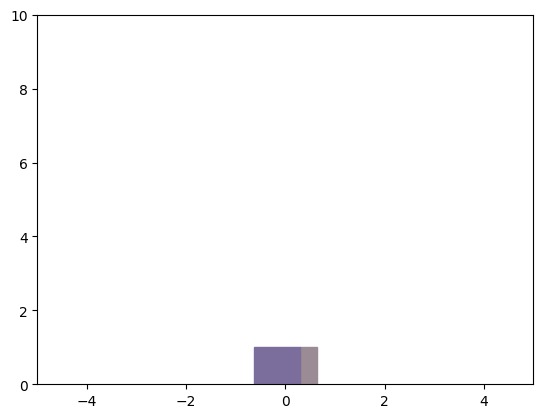

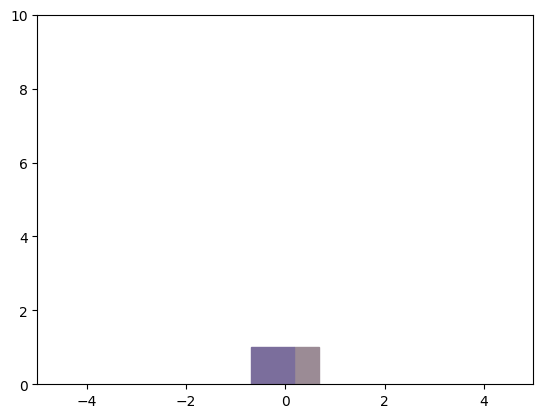

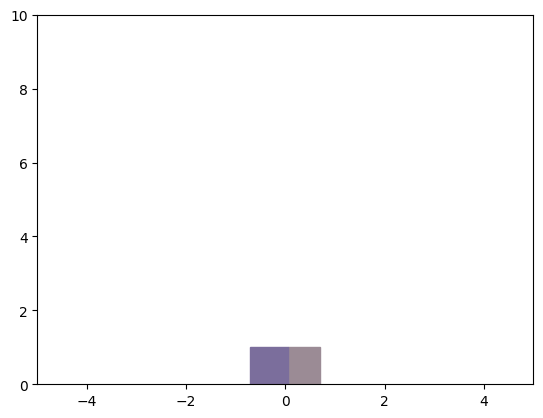

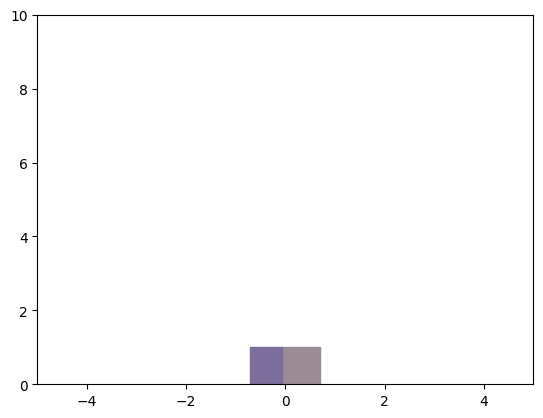

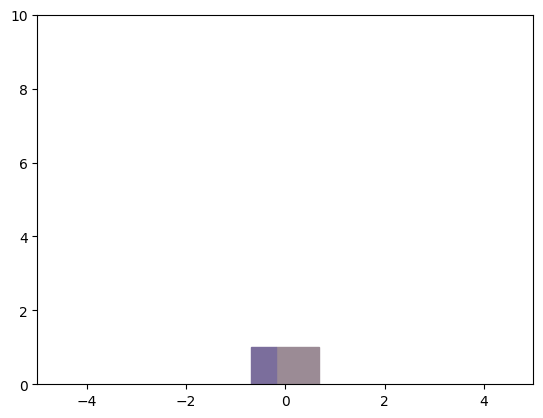

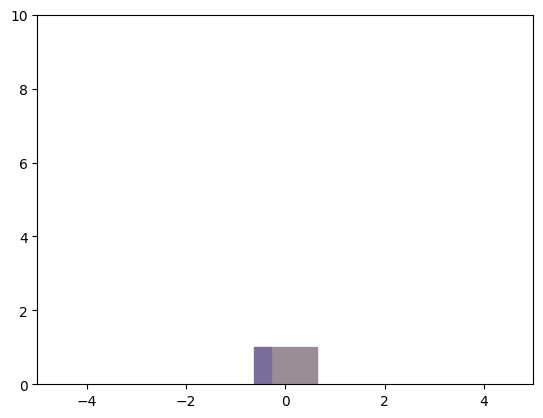

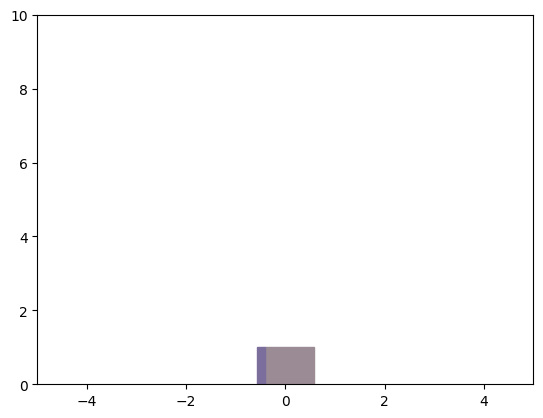

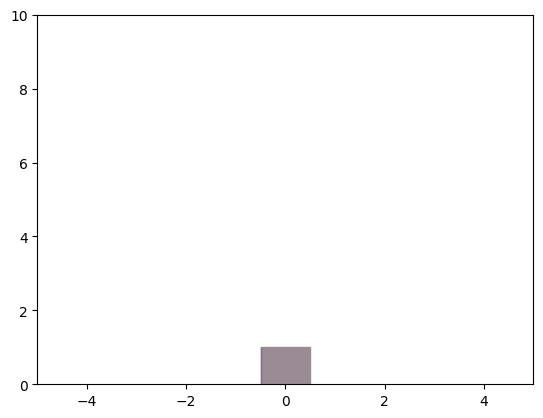

In [110]:
n = 0

while n <= 360:
    newO = rotatePoints(object, n)
    printImage(newO, perspective, colors)
    n += 10
